In [2]:
from matplotlib import pyplot as plt
import numpy as np
import json
import math
import csv
import os

In [3]:
def denormalization(arr, angle, translation):

    theta = (angle)/180*math.pi
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    #rotate
    arr = np.array(R.dot(arr.transpose())).transpose()
    #translate
    arr += translation
#     arr[...,0] += (AGENT[19,0] - AGENT[0,0])
#     arr[...,1] += (AGENT[19,1] - AGENT[0,1])
    return arr

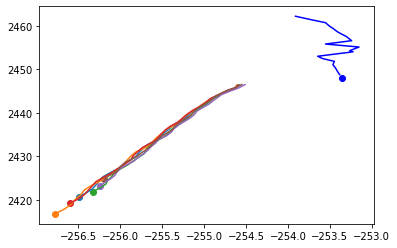

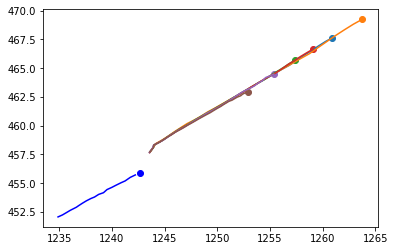

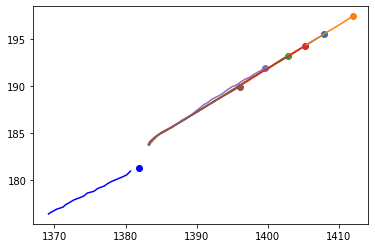

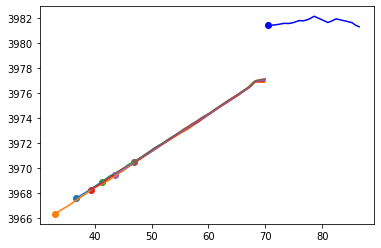

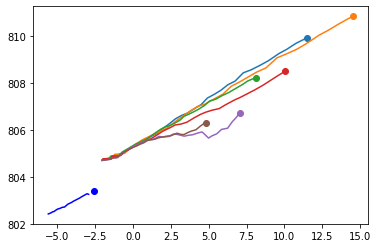

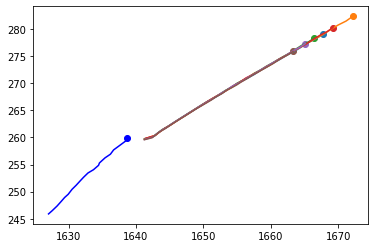

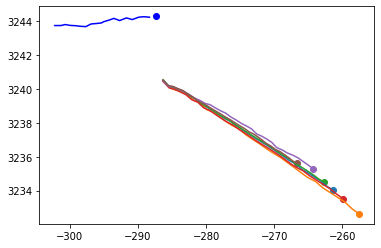

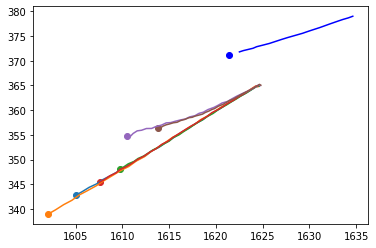

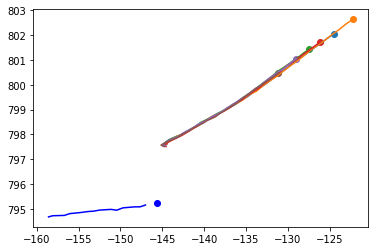

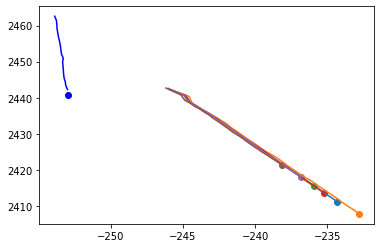

In [5]:
root_dir = "ResultsJson77/"
file_list = sorted(os.listdir(root_dir), key=lambda a : int(a.split('.')[0]))

for index in range(10,20):

    json_dict = {}
    AGENT = []

    with open(root_dir + file_list[index], 'r') as json_data:
        json_dict = json.load(json_data)

    with open(json_dict['csv_path'][25:]) as csvfile: #val: 33, Test:25
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == 'AGENT':
                AGENT.append([float(row[3]), float(row[4])])


    AGENT = np.array(AGENT)
    preds = np.array(json_dict['preds'][0])[...,:2]
    
    preds = np.array([denormalization(p, -json_dict['rotation'], -np.array(json_dict['translation'])) for p in preds])

    for p in preds:
        plt.plot(p[...,0],p[...,1])
        plt.scatter(p[...,0][-1],p[...,1][-1])

    plt.plot(AGENT[...,0][:19],AGENT[...,1][:19], color='blue')
    plt.plot(AGENT[...,0][20:],AGENT[...,1][20:], color='blue', linewidth = 8,zorder=-1)
    plt.scatter(AGENT[...,0][-1],AGENT[...,1][-1], color = 'blue')

    plt.plot()
    plt.show()


In [98]:
-1 * np.array(json_dict['translation'])

array([1539.03552246,  242.48617554])

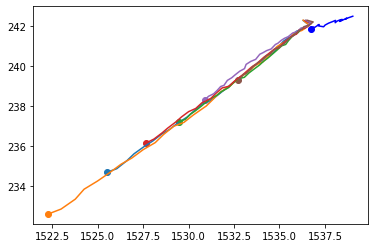

In [111]:
root_dir = "ResultsJson77/"
file_list = sorted(os.listdir(file_root), key=lambda a : int(a.split('.')[0]))

for index in range(0,1):

    json_dict = {}
    AGENT = []

    with open(root_dir + file_list[index], 'r') as json_data:
        json_dict = json.load(json_data)

    with open(json_dict['csv_path'][25:]) as csvfile: #val: 33, Test:25
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[2] == 'AGENT':
                AGENT.append([float(row[3]), float(row[4])])
    theta = -json_dict["rotation"] * math.pi/180
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    AGENT = np.array(AGENT)

    # AGENT = R.dot(AGENT.transpose()).transpose()

    preds = np.array(json_dict['preds'][0])[...,:2]
    preds = np.array([R.dot(p.transpose()).transpose() for p in preds])
    preds -= json_dict['translation']

    for p in preds:
        plt.plot(p[...,0],p[...,1])
        plt.scatter(p[...,0][-1],p[...,1][-1])

    plt.plot(AGENT[...,0][:19],AGENT[...,1][:19], color='blue')
    plt.plot(AGENT[...,0][20:],AGENT[...,1][20:], color='blue', linewidth = 8,zorder=-1)
    plt.scatter(AGENT[...,0][-1],AGENT[...,1][-1], color = 'blue')

    plt.plot()
    plt.show()
